# Data Describing

In [537]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

In [180]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [181]:
data = yf.download(" GOOG ^VIX", start="2020-10-01", end="2021-10-1")

[*********************100%***********************]  2 of 2 completed


In [182]:
data.head()

Adj Close                   Close                    High  \
                   GOOG       ^VIX         GOOG       ^VIX         GOOG   
Date                                                                      
2020-09-30  1469.599976  26.370001  1469.599976  26.370001  1489.750000   
2020-10-01  1490.089966  26.700001  1490.089966  26.700001  1499.040039   
2020-10-02  1458.420044  27.629999  1458.420044  27.629999  1483.199951   
2020-10-05  1486.020020  27.959999  1486.020020  27.959999  1488.209961   
2020-10-06  1453.439941  29.480000  1453.439941  29.480000  1486.760010   

                               Low                    Open             \
                 ^VIX         GOOG       ^VIX         GOOG       ^VIX   
Date                                                                    
2020-09-30  27.120001  1459.880005  25.059999  1466.800049  26.690001   
2020-10-01  27.110001  1479.209961  25.330000  1484.270020  25.780001   
2020-10-02  29.900000  1450.920044  26.930000  1462.030029  28.870001   
2020-10-05  29.690001  1464.270020  27.270000  1466.209961  29.520000   
2020-10-06  30.000000  1448.589966  26.010000  1475.579956  28.049999   

             Volume       
               GOOG ^VIX  
Date                      
2020-09-30  1701600    0  
2020-10-01  1779500    0  
2020-10-02  1284100    0  
2020-10-05  1113300    0  
2020-10-06  1245400    0

In [183]:
data.tail()

Adj Close                   Close                    High  \
                   GOOG       ^VIX         GOOG       ^VIX         GOOG   
Date                                                                      
2021-09-24  2852.659912  17.750000  2852.659912  17.750000  2858.070068   
2021-09-27  2830.020020  18.760000  2830.020020  18.760000  2850.000000   
2021-09-28  2723.679932  23.250000  2723.679932  23.250000  2792.129883   
2021-09-29  2690.419922  22.559999  2690.419922  22.559999  2747.969971   
2021-09-30  2665.310059  23.139999  2665.310059  23.139999  2711.800049   

                              Low                    Open              Volume  \
                 ^VIX        GOOG       ^VIX         GOOG       ^VIX     GOOG   
Date                                                                            
2021-09-24  20.410000  2817.01001  17.629999  2818.919922  19.330000   747500   
2021-09-27  19.320000  2810.00000  17.740000  2831.709961  17.780001   942200   
2021-09-28  24.820000  2714.00000  19.709999  2781.770020  19.740000  2109500   
2021-09-29  23.790001  2685.00000  21.450001  2742.194092  22.070000  1316900   
2021-09-30  24.709999  2660.00000  20.600000  2686.500000  21.480000  1764700   

                 
           ^VIX  
Date             
2021-09-24    0  
2021-09-27    0  
2021-09-28    0  
2021-09-29    0  
2021-09-30    0

In [184]:
data_1 =  data['Adj Close']
data_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-09-30 to 2021-09-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOG    253 non-null    float64
 1   ^VIX    253 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


# Stock changes

In [185]:
data_1.diff().head()

,GOOG,^VIX
Date,,
2020-09-30,NaN,NaN
2020-10-01,20.489990,0.330000
2020-10-02,-31.669922,0.929998
2020-10-05,27.599976,0.330000
2020-10-06,-32.580078,1.520000


In [186]:
data_1.describe().round(2)

,GOOG,^VIX
count,253.00,253.00
mean,2202.11,21.29
std,424.37,4.62
min,1453.44,15.07
25%,1781.38,17.69
50%,2137.75,20.79
75%,2545.64,23.25
max,2916.84,40.28


In [187]:
data_1.diff().describe().round(2)

,GOOG,^VIX
count,252.00,252.00
mean,4.74,-0.01
std,31.96,2.01
min,-106.34,-7.00
25%,-11.53,-0.95
50%,5.66,-0.21
75%,20.63,0.81
max,142.56,14.19


In [188]:
data_1.pct_change().round(4).head()

,GOOG,^VIX
Date,,
2020-09-30,NaN,NaN
2020-10-01,0.0139,0.0125
2020-10-02,-0.0213,0.0348
2020-10-05,0.0189,0.0119
2020-10-06,-0.0219,0.0544


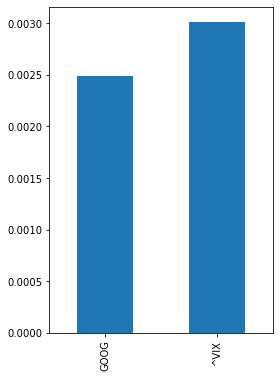

In [189]:
data_1.pct_change().mean().plot(kind='bar', figsize=(4, 6));

In [190]:
data_2 = data_1.resample('1m', label='right').last().head()
data_2

,GOOG,^VIX
Date,,
2020-09-30,1469.599976,26.370001
2020-10-31,1621.010010,38.020000
2020-11-30,1760.739990,20.570000
2020-12-31,1751.880005,22.750000
2021-01-31,1835.739990,33.090000


In [486]:
rets = np.log(data_1 / data_1.shift(1))
rets.head().round(4)

,GOOG,^VIX
Date,,
2020-09-30,NaN,NaN
2020-10-01,0.0138,0.0124
2020-10-02,-0.0215,0.0342
2020-10-05,0.0187,0.0119
2020-10-06,-0.0222,0.0529


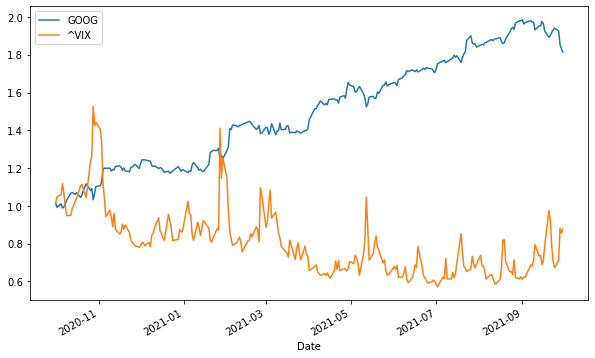

In [487]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [191]:
Corr_data = data_1.dropna()
Corr_data.head()

,GOOG,^VIX
Date,,
2020-09-30,1469.599976,26.370001
2020-10-01,1490.089966,26.700001
2020-10-02,1458.420044,27.629999
2020-10-05,1486.020020,27.959999
2020-10-06,1453.439941,29.480000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

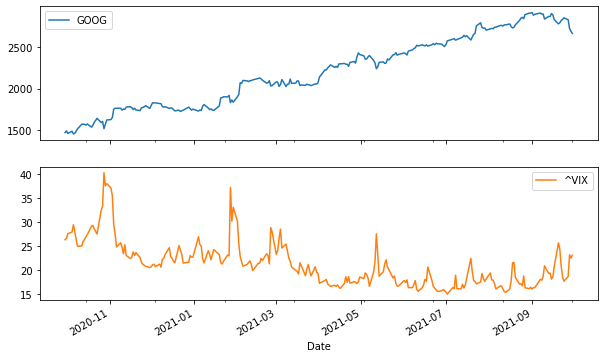

In [192]:
Corr_data.plot(subplots=True, figsize=(10, 6))

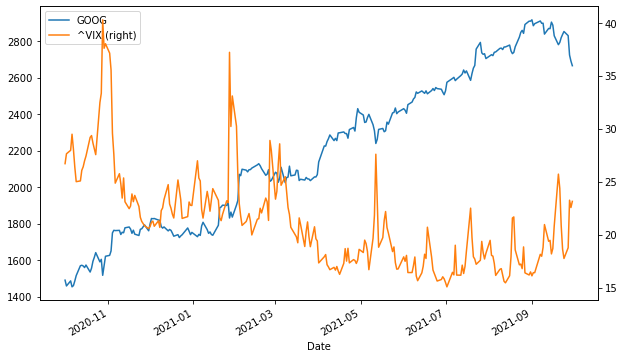

In [193]:
Corr_data.loc['2020-10-01':].plot(secondary_y='^VIX', figsize=(10, 6));

In [194]:
log_return = np.log(Corr_data / Corr_data.shift(1))
log_return.head()

,GOOG,^VIX
Date,,
2020-09-30,NaN,NaN
2020-10-01,0.013846,0.012437
2020-10-02,-0.021483,0.034239
2020-10-05,0.018748,0.011873
2020-10-06,-0.022168,0.052937


In [195]:
log_return.corr()

,GOOG,^VIX
GOOG,1.000000,-0.613559
^VIX,-0.613559,1.000000


# Input Volatility

In [196]:
GOOG = yf.Ticker('GOOG')
option = GOOG.option_chain('2021-12-10')
option.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,GOOG211210C02170000,2021-11-08 14:33:03,2170.0,814.50,674.0,692.00,0.0,0.00000,NaN,1,1.046269,True,REGULAR,USD
1,GOOG211210C02200000,2021-11-29 15:04:51,2200.0,680.10,644.3,662.00,0.0,0.00000,1.0,15,1.009404,True,REGULAR,USD
2,GOOG211210C02370000,2021-11-23 14:36:27,2370.0,580.90,476.0,493.00,0.0,0.00000,NaN,1,0.810427,True,REGULAR,USD
3,GOOG211210C02400000,2021-12-01 20:25:36,2400.0,455.90,447.5,463.50,0.0,0.00000,1.0,5,0.796999,True,REGULAR,USD
4,GOOG211210C02460000,2021-11-08 14:33:03,2460.0,370.00,387.0,404.50,0.0,0.00000,1.0,2,0.709292,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,GOOG211210C03550000,2021-11-24 16:12:58,3550.0,0.40,0.0,0.55,0.0,0.00000,101.0,101,0.634281,False,REGULAR,USD
80,GOOG211210C03600000,2021-11-18 19:01:58,3600.0,1.30,0.0,1.30,0.0,0.00000,NaN,2,0.735354,False,REGULAR,USD
81,GOOG211210C03650000,2021-11-18 19:01:58,3650.0,0.05,0.0,1.30,0.0,0.00000,10.0,12,0.772951,False,REGULAR,USD
82,GOOG211210C04100000,2021-12-03 20:40:24,4100.0,0.05,0.0,0.10,-0.1,-66.66667,4.0,30,0.863283,False,REGULAR,USD


In [197]:
option.calls[:40]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,GOOG211210C02170000,2021-11-08 14:33:03,2170.0,814.50,674.0,692.0,0.000000,0.000000,NaN,1,1.046269,True,REGULAR,USD
1,GOOG211210C02200000,2021-11-29 15:04:51,2200.0,680.10,644.3,662.0,0.000000,0.000000,1.0,15,1.009404,True,REGULAR,USD
2,GOOG211210C02370000,2021-11-23 14:36:27,2370.0,580.90,476.0,493.0,0.000000,0.000000,NaN,1,0.810427,True,REGULAR,USD
3,GOOG211210C02400000,2021-12-01 20:25:36,2400.0,455.90,447.5,463.5,0.000000,0.000000,1.0,5,0.796999,True,REGULAR,USD
4,GOOG211210C02460000,2021-11-08 14:33:03,2460.0,370.00,387.0,404.5,0.000000,0.000000,1.0,2,0.709292,True,REGULAR,USD
5,GOOG211210C02480000,2021-11-19 17:04:42,2480.0,541.40,366.7,385.0,0.000000,0.000000,1.0,1,0.680240,True,REGULAR,USD
6,GOOG211210C02500000,2021-12-03 19:41:16,2500.0,333.74,347.9,365.5,-44.260010,-11.708997,10.0,9,0.669376,True,REGULAR,USD
7,GOOG211210C02600000,2021-12-03 20:46:41,2600.0,237.68,252.4,269.5,-47.020020,-16.515636,15.0,18,0.580143,True,REGULAR,USD
8,GOOG211210C02640000,2021-11-26 17:41:20,2640.0,248.70,216.2,231.5,0.000000,0.000000,1.0,1,0.547887,True,REGULAR,USD
9,GOOG211210C02650000,2021-11-23 14:36:27,2650.0,300.00,207.7,222.1,0.000000,0.000000,NaN,4,0.542149,True,REGULAR,USD


In [440]:
data_3 = yf.download("GOOG", start="2020-10-1", end="2021-10-1")

[*********************100%***********************]  1 of 1 completed


In [441]:
S = data_3['Adj Close'][-1]
K = opt.calls['strike']
T = 1
r = 0.0025
q = 0.53
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol

GOOG    0.247049
^VIX    1.314222
dtype: float64

# Binominal Tree

In [510]:
S0 = 2850.41              # spot stock price
K =  2670.00             # strike
T = 1.0                 # maturity 
r = 0.0025                # risk free rate 
vol = 0.247             # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "call"          # payoff 

In [511]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u  

In [512]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [513]:
S

array([[2850.41      , 3253.32013612, 3713.18228187, 4238.04669738],
       [   0.        , 2497.39860455, 2850.41      , 3253.32013612],
       [   0.        ,    0.        , 2188.10619876, 2497.39860455],
       [   0.        ,    0.        ,    0.        , 1917.11836803]])

In [514]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4701383837810353

In [515]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[   0.        ,    0.        ,    0.        , 1568.04669738],
       [   0.        ,    0.        ,    0.        ,  583.32013612],
       [   0.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ]])

In [516]:

for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 366.97183169,  636.14415002, 1045.40635504, 1568.04669738],
       [   0.        ,  128.71660142,  274.0127469 ,  583.32013612],
       [   0.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ]])

In [517]:
print('European ' + payoff, str( V[0,0]))

European call 366.97183168914165


# Black-Scholes Model

In [450]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [451]:
euro_option_bs(2850.41, 2670, 1, 0.0025, 0.247, 'call')

374.62141378818706

In [518]:
S = np.linspace(10,10000,1000)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i] , 2670, 1, 0.0025, 0.247, 'call')

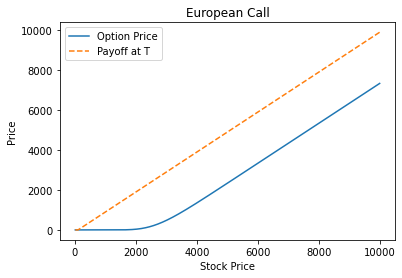

In [519]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

# Delta

In [454]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta


In [538]:
delta(2850.41, 2670, 1, 0.0025, 0.00, 0.247, "call")

0.6548085561213757

In [539]:
delta(2850.41, 2670, 1, 0.0025, 0.00, 0.247, "put")

-0.3451914438786243

In [542]:
D = np.linspace(100,6000,100)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 2670, 1, 0.0025, 0.00, 0.247, "call")
    Delta_Put [i] = delta(S[i], 2670, 1, 0.0025, 0.00, 0.247, "put")

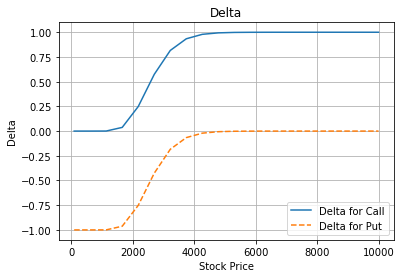

In [543]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

In [557]:
S = np.linspace(50, 6000, 51)
T = np.linspace(0.5, 20, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j],2670 , T[i], 0.0025, 0.00, 0.247, 'call')

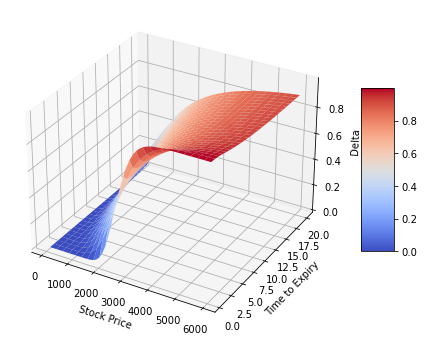

In [558]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Gamma

In [546]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [571]:
gamma(2850.41, 2670, 1, 0.0025, 0.00, 0.247, "call")

0.0005234205516340938

In [572]:
gamma(2850.41, 2670, 1, 0.0025, 0.00, 0.247, "put")

0.0005234205516340938

In [577]:
G = np.linspace(50,6000,11)
Gamma = np.zeros((len(G),1))
for i in range(len(G)):
    Gamma [i] = gamma(G[i],2670, 1, 0.0025, 0.00, 0.247, 'call')

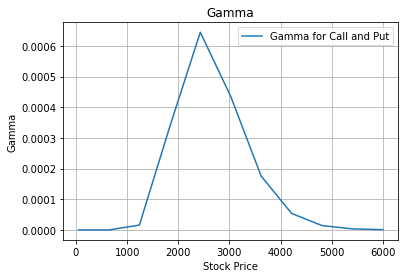

In [578]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

In [564]:
S = np.linspace(10, 6000, 51)
T = np.linspace(0.5, 20, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j],2670 , T[i], 0.0025, 0.00, 0.247, 'call')

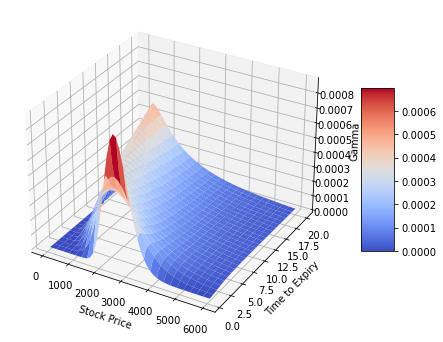

In [565]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Speed

In [465]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed


In [579]:
speed(2850.41, 2670, 1, 0.0025, 0.00, 0.247, "call")

-4.797688512920522e-07

In [580]:
speed(2850.41, 2670, 1, 0.0025, 0.00, 0.247, "put")

-4.797688512920522e-07

In [584]:
S = np.linspace(100,6000,20)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 2670, 1, 0.0025, 0.00, 0.247, "call")

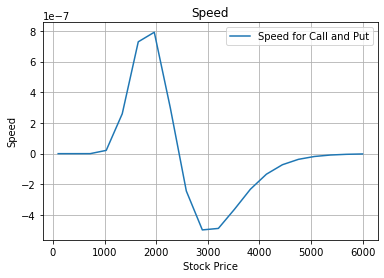

In [585]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

In [643]:
S = np.linspace(300, 6000, 21)
T = np.linspace(0.2, 10, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 2670, T[i], 0.0025, 0.00, 0.247, 'call')

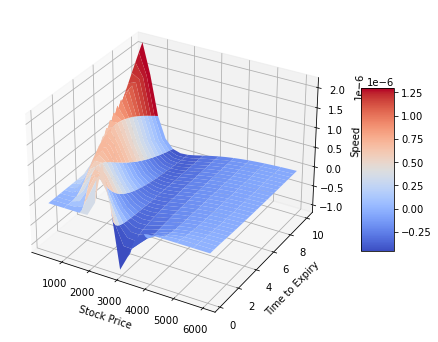

In [644]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Rho

In [610]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [611]:
rho(2850.41, 2670, 1, 0.0025, 0.00, 0.247, "call")

1491.8514426657432

In [612]:
rho(2850.41, 2670, 1, 0.0025, 0.00, 0.247, "put")

-1171.4818941354754

In [613]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(2850.41, 2670, 1, r[i], 0.00, 0.247, "call")
    Rho_Put [i] = rho(2850.41, 2670, 1, r[i], 0.00, 0.247, "put")

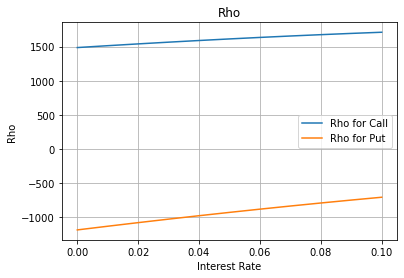

In [614]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])


In [619]:
S = np.linspace(50, 5000, 51)
T = np.linspace(0.5, 10, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 2670, T[i], 0.0025, 0.00, 0.247, 'call')

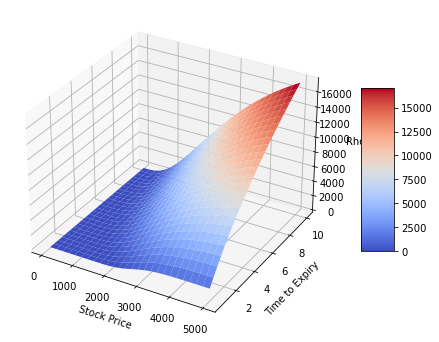

In [620]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Vega

In [645]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [646]:
vega(2850.41, 2670, 1, 0.0025, 0.00, 0.247, "call")

1050.4185678586302

In [647]:
vega(2850.41, 2670, 1, 0.0025, 0.00, 0.247, "put")

1050.4185678586302

In [725]:
vol = np.linspace(0.000001,50,3)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(2850.41, 2670, 1, 0.0025, 0.00, vol[i], "call")

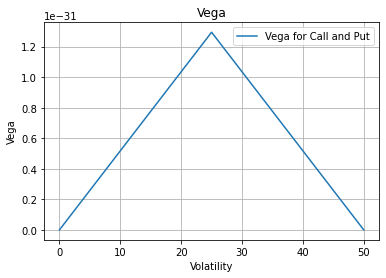

In [726]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])

In [697]:
S = np.linspace(50, 6000, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 2670, T[i], 0.0025, 0.00, 0.247, 'call')

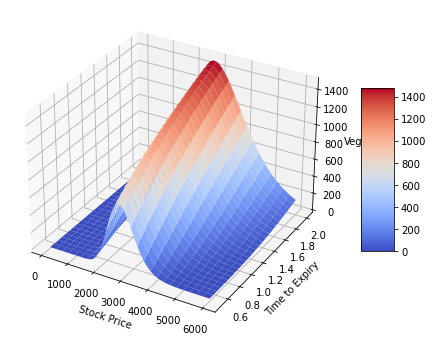

In [698]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);